In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

torch.__version__, np.__version__

('1.12.0+cpu', '1.23.3')

In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

import Dataset

In [3]:
import requests
import zipfile
import os

# Setup path to data folder
data_path = 'data'
image_path = os.path.join(data_path, 'pizza_steak_sushi')

# If the image folder doesn't exist, download it and prepare it... 
if os.path.exists(image_path):
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    os.makedirs(image_path, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(image_path + '.zip', "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(image_path + '.zip', "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

data\pizza_steak_sushi directory exists.


Become with the data

In [4]:
for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [5]:
# setup train and test path
train_path = os.path.join(image_path, 'train')
test_path = os.path.join(image_path, 'test')

512 384


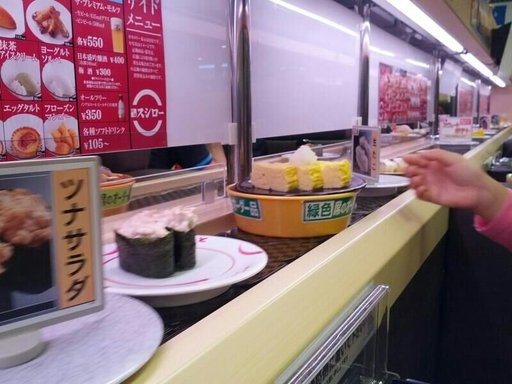

In [6]:
#visulize images
from PIL import Image

pizza_image_path = [ os.path.join(image_path,'train','pizza', i) for i in os.listdir(os.path.join(train_path, 'pizza')) ]
steak_image_path = [ os.path.join(image_path,'train','steak', i) for i in os.listdir(os.path.join(train_path, 'steak')) ]
sushi_image_path = [ os.path.join(image_path,'train','sushi', i) for i in os.listdir(os.path.join(train_path, 'sushi')) ]

#Open image
img = Image.open(sushi_image_path[30])
print(img.width, img.height)
img

## Transforming data
turn images to numbers

In [7]:
data_transform_train = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5), # flip images 50% randomly (horizontal) 
    transforms.ToTensor() # this also converts [0,255] -> [0,1]
])

data_transform_test = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor() # this also converts [0,255] -> [0,1]
])

In [8]:
train_images = datasets.ImageFolder(root=train_path, transform=data_transform_train, target_transform=None)
test_images = datasets.ImageFolder(root=test_path, transform=data_transform_test, target_transform=None)

print(f"Train data:\n{train_images}\nTest data:\n{test_images}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )


In [9]:
# get class names
class_names = train_images.classes
class_dict = train_images.class_to_idx
class_names, class_dict

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [10]:
len(train_images), len(test_images)

(225, 75)

Turn loaded images into DataLoader's

In [11]:
train_dataloader = DataLoader(dataset=train_images, batch_size=32, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset=test_images, batch_size=32, num_workers=os.cpu_count(), shuffle=False)

In [12]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [13]:
class_names

['pizza', 'steak', 'sushi']

In [14]:
# create function to display random images

def display_random_images(dataset, class_names, n, display_shape, seed) :
    
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
        
    # 3. Set random seed
    if seed:
        np.random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = np.random.permutation((len(dataset)))[:n]

    # 5. Setup plot
    plt.figure(figsize=(16, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0) # switch channel to the last order

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if class_names:
            title = f"class: {class_names[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

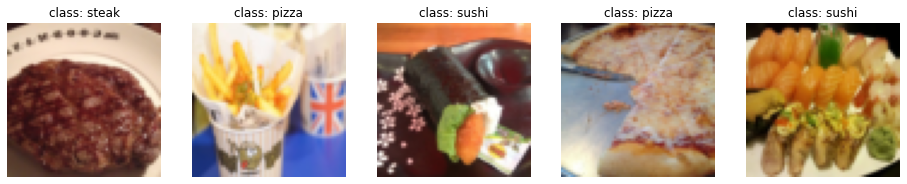

In [15]:
display_random_images(train_images, 
                      n=5, 
                      class_names=class_names,
                      display_shape=False,
                      seed=None)

Other image transform | RandomPerspective

In [16]:
original_transform = transforms.Compose([ 
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

Random_Perspective = transforms.Compose([ 
    transforms.Resize((224,224)),
    transforms.RandomPerspective(),
    transforms.ToTensor()
])

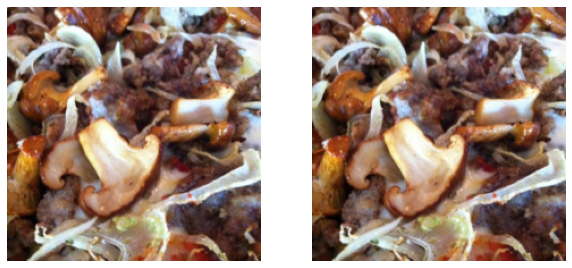

In [17]:
sample_image_path = pizza_image_path[20]
img_path = Image.open(sample_image_path)
original_img = original_transform(img_path).permute(1, 2, 0) # chanel to last
rper_img = Random_Perspective(img_path).permute(1, 2, 0) 
plt.figure(figsize=(10,10))
for i,image in enumerate([original_img, rper_img]):
    plt.subplot(1,2,i+1)
    plt.imshow(image)
    plt.axis('off')


In [18]:
# create tinyVgg model
class TinyVGG(nn.Module) :
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, 
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) 
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [19]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_images.classes)).to(device)
model_0.forward(img) # let's see what should use shape for each layers 

tensor([[0.0612, 0.0644, 0.0446],
        [0.0625, 0.0625, 0.0346],
        [0.0593, 0.0587, 0.0375],
        [0.0603, 0.0635, 0.0377],
        [0.0642, 0.0646, 0.0353],
        [0.0643, 0.0625, 0.0364],
        [0.0647, 0.0617, 0.0372],
        [0.0565, 0.0583, 0.0420],
        [0.0601, 0.0587, 0.0401],
        [0.0714, 0.0663, 0.0399],
        [0.0635, 0.0618, 0.0374],
        [0.0649, 0.0659, 0.0398],
        [0.0587, 0.0595, 0.0358],
        [0.0740, 0.0676, 0.0400],
        [0.0596, 0.0612, 0.0371],
        [0.0642, 0.0621, 0.0389],
        [0.0661, 0.0588, 0.0393],
        [0.0613, 0.0585, 0.0362],
        [0.0661, 0.0593, 0.0413],
        [0.0660, 0.0590, 0.0398],
        [0.0738, 0.0627, 0.0442],
        [0.0625, 0.0579, 0.0378],
        [0.0600, 0.0616, 0.0376],
        [0.0688, 0.0647, 0.0378],
        [0.0653, 0.0622, 0.0409],
        [0.0636, 0.0665, 0.0390],
        [0.0673, 0.0640, 0.0352],
        [0.0672, 0.0653, 0.0385],
        [0.0699, 0.0653, 0.0364],
        [0.062

# Training 

In [8]:
def train_step(model, dataloader, loss_fn, optimizer) :
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (x,y) in enumerate(dataloader) :
        x, y = x.to(device), y.to(device)

        #forward pass
        y_pred = model(x) # same as model.forward(x)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        
        #update weight and bias
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    # adjust to take avg for each batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [9]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():

        for batch, (x, y) in enumerate(dataloader):
            x, y = x.to(device), y.to(device)
    
            test_pred_logits = model(x)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

combine each step together

In [10]:
from tqdm.auto import tqdm

def train_model(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5) :
    
    best_loss = np.Infinity
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)) :
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
        test_loss, test_acc = test_step(model, test_dataloader, loss_fn)

        if  test_loss < best_loss: 
            best_loss = test_loss
            model_name = 'best_model.pth'
            torch.save(model.state_dict(), f'./save_model/{model_name}')
            print(f'save model to ./save_model/{model_name} with loss {test_loss:.4f}')
    
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        #Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
    
    return results

Training the Model

In [23]:
from timeit import default_timer as timer 

# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.003)

start_time = timer()

model_0_result = train_model(model_0, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1187 | train_acc: 0.2617 | test_loss: 1.2001 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.0915 | train_acc: 0.4258 | test_loss: 1.1447 | test_acc: 0.1979
Epoch: 3 | train_loss: 1.1127 | train_acc: 0.2930 | test_loss: 1.1390 | test_acc: 0.1979
Epoch: 4 | train_loss: 1.0981 | train_acc: 0.4141 | test_loss: 1.1121 | test_acc: 0.1979
Epoch: 5 | train_loss: 1.0968 | train_acc: 0.2930 | test_loss: 1.1283 | test_acc: 0.1979
Epoch: 6 | train_loss: 1.0959 | train_acc: 0.2930 | test_loss: 1.1415 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.1168 | train_acc: 0.3047 | test_loss: 1.1345 | test_acc: 0.2292
Epoch: 8 | train_loss: 1.1001 | train_acc: 0.2930 | test_loss: 1.1032 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.0988 | train_acc: 0.2930 | test_loss: 1.0993 | test_acc: 0.1979
Epoch: 10 | train_loss: 1.0979 | train_acc: 0.4258 | test_loss: 1.0965 | test_acc: 0.5417
Total training time: 90.290 seconds


In [25]:
save_path = './save_model/ModelV0_pss.pth'
torch.save(model_0.state_dict(), f=save_path)

In [26]:
modelV0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=3)
modelV0.load_state_dict(torch.load(f=save_path))

<All keys matched successfully>

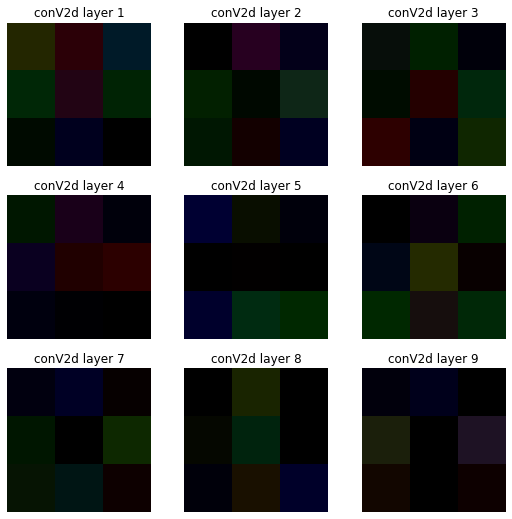

In [27]:
plt.figure(figsize=(9,9))
for i,conv2d_layer in enumerate( dict(modelV0.state_dict())['conv_block_1.0.weight']) :
    if i == 9 :
        break
    plt.subplot(3,3,i+1) 
    plt.title(f'conV2d layer {i+1}')
    plt.imshow(conv2d_layer.relu())
    plt.axis('off')

## Dimention Reduction

In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=10) # 64x3x3 -> 2 dimention
transformers = transforms.Compose([ 
    transforms.Resize((64,64)),
    transforms.ToTensor()
])
images = datasets.ImageFolder(train_path, transformers, target_transform=None)
dataloader = DataLoader(images, batch_size=225, shuffle=False) # all of images

In [71]:
images, labels = next(iter(dataloader))
images.shape, labels.shape

(torch.Size([225, 3, 64, 64]), torch.Size([225]))

In [72]:
imagesFlatten = torch.flatten(images, start_dim=1)
imgesReduced = tsne.fit_transform(imagesFlatten)

c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


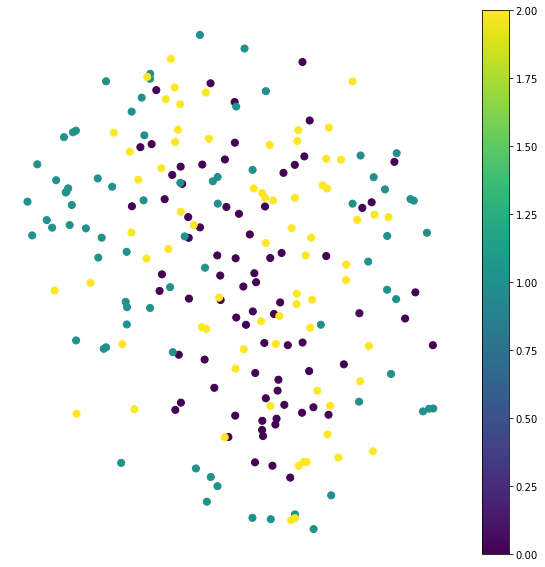

In [89]:
plt.figure(figsize=(10,10))
plt.scatter(imgesReduced[:,0], imgesReduced[:,1], c=labels, s=50)
plt.axis('off')
plt.colorbar();

## Create modelV1 

In [14]:
transformersTrainV1 = transforms.Compose([ 
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
transformersTestV1 = transforms.Compose([ 
    transforms.Resize((224,224)),
    transforms.ToTensor()
])

train_images = datasets.ImageFolder(root=train_path, transform=transformersTrainV1, target_transform=None)
test_images = datasets.ImageFolder(root=test_path, transform=transformersTestV1, target_transform=None)

class_names = train_images.classes
class_names

['pizza', 'steak', 'sushi']

In [15]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_images, batch_size=BATCH_SIZE,num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(test_images, batch_size=BATCH_SIZE,num_workers=os.cpu_count(), shuffle=False)

images, labels = next(iter(train_dataloader))
images.shape, labels

(torch.Size([32, 3, 224, 224]),
 tensor([2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
         1, 2, 0, 0, 1, 0, 2, 2]))

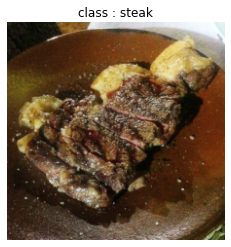

In [27]:
sample_idx = 29
plt.imshow(images[sample_idx].permute(1,2,0))
plt.title(f'class : {class_names[labels[sample_idx]]}')
plt.axis('off');

In [7]:
# create CNNModel
class CNNModel(nn.Module) :
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        
        self.conV2d_1 = nn.Conv2d(input_shape, out_channels=hidden_units, kernel_size=(3,3), padding='valid')
        self.conV2d_2 = nn.Conv2d(hidden_units, out_channels=32, kernel_size=(3,3), padding='valid')
        self.relu = nn.ReLU()
        self.maxpool2d = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.dense = nn.Linear(in_features=hidden_units*11664, out_features=output_shape)
    
    def forward(self, x: torch.Tensor):
        # conV2d 1
        x = self.conV2d_1(x)
        x = self.maxpool2d(x)
        x = self.relu(x)
        # conV2d 2
        x = self.conV2d_2(x)
        x = self.maxpool2d(x)
        x = self.relu(x)
        # classification layer
        x = self.flatten(x)
        x = self.dense(x)
        return x

In [37]:
# test model layers and shape
modelTester = CNNModel(input_shape=3, hidden_units=8, output_shape=3).to(device)
modelTester(images)

tensor([[-0.0183,  0.0270,  0.0218],
        [-0.0105,  0.0076, -0.0035],
        [ 0.0065,  0.0109,  0.0103],
        [-0.0544,  0.0042,  0.0021],
        [-0.0434,  0.0249, -0.0137],
        [-0.0382, -0.0030,  0.0038],
        [-0.0594,  0.0101,  0.0120],
        [ 0.0014,  0.0024, -0.0034],
        [-0.0477, -0.0002,  0.0113],
        [-0.0379,  0.0242, -0.0015],
        [-0.0077,  0.0165,  0.0041],
        [-0.0612,  0.0193,  0.0064],
        [-0.0210,  0.0071,  0.0071],
        [-0.0279, -0.0012,  0.0097],
        [-0.0284,  0.0101, -0.0089],
        [-0.0102,  0.0078,  0.0166],
        [-0.0343,  0.0201,  0.0162],
        [-0.0228,  0.0249, -0.0135],
        [-0.0448,  0.0203,  0.0050],
        [-0.0362, -0.0052,  0.0084],
        [-0.0284,  0.0153,  0.0184],
        [-0.0305,  0.0125, -0.0157],
        [ 0.0095,  0.0230,  0.0159],
        [ 0.0055,  0.0252,  0.0063],
        [-0.0279,  0.0155,  0.0291],
        [-0.0267, -0.0038, -0.0017],
        [-0.0238,  0.0163, -0.0063],
 

In [44]:
# train model
from timeit import default_timer as timer 

torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 10

modelV1 = CNNModel(input_shape=3, hidden_units=8, output_shape=3).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=modelV1.parameters(), lr=0.01)

start_time = timer()

modelV1Result = train_model(modelV1, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1052 | train_acc: 0.4336 | test_loss: 3.2985 | test_acc: 0.2604
Epoch: 2 | train_loss: 1.2634 | train_acc: 0.4531 | test_loss: 1.2743 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0898 | train_acc: 0.3398 | test_loss: 0.9894 | test_acc: 0.5417
Epoch: 4 | train_loss: 1.0681 | train_acc: 0.3711 | test_loss: 0.9579 | test_acc: 0.5417
Epoch: 5 | train_loss: 1.0403 | train_acc: 0.4258 | test_loss: 0.9602 | test_acc: 0.5843
Epoch: 6 | train_loss: 1.0132 | train_acc: 0.4727 | test_loss: 1.4134 | test_acc: 0.1979
Epoch: 7 | train_loss: 1.1210 | train_acc: 0.3438 | test_loss: 1.1668 | test_acc: 0.1875
Epoch: 8 | train_loss: 1.0188 | train_acc: 0.5078 | test_loss: 1.1543 | test_acc: 0.2396
Epoch: 9 | train_loss: 1.0196 | train_acc: 0.4570 | test_loss: 0.9901 | test_acc: 0.6146
Epoch: 10 | train_loss: 0.9601 | train_acc: 0.5820 | test_loss: 1.2636 | test_acc: 0.2917
Total training time: 159.393 seconds


### Continue train and adjust some parameters

In [47]:
NUM_EPOCHS = 10

optimizer = torch.optim.SGD(params=modelV1.parameters(), lr=0.005)

start_time = timer()

modelV1Result = train_model(modelV1, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9305 | train_acc: 0.5664 | test_loss: 1.1282 | test_acc: 0.3428
Epoch: 2 | train_loss: 0.9295 | train_acc: 0.4961 | test_loss: 0.8763 | test_acc: 0.5938
Epoch: 3 | train_loss: 1.0330 | train_acc: 0.5391 | test_loss: 1.2603 | test_acc: 0.1979
Epoch: 4 | train_loss: 0.8746 | train_acc: 0.5781 | test_loss: 0.9950 | test_acc: 0.5786
Epoch: 5 | train_loss: 0.9547 | train_acc: 0.5547 | test_loss: 0.8789 | test_acc: 0.6042
Epoch: 6 | train_loss: 0.8677 | train_acc: 0.6875 | test_loss: 1.0616 | test_acc: 0.3835
Epoch: 7 | train_loss: 0.8975 | train_acc: 0.5508 | test_loss: 1.2484 | test_acc: 0.2396
Epoch: 8 | train_loss: 0.8515 | train_acc: 0.6641 | test_loss: 0.8901 | test_acc: 0.5549
Epoch: 9 | train_loss: 0.7971 | train_acc: 0.6758 | test_loss: 1.3099 | test_acc: 0.4044
Epoch: 10 | train_loss: 0.7604 | train_acc: 0.6641 | test_loss: 1.1256 | test_acc: 0.4451
Total training time: 172.491 seconds


In [57]:
NUM_EPOCHS = 10

optimizer = torch.optim.SGD(params=modelV1.parameters(), lr=0.001)

start_time = timer()

modelV1Result = train_model(modelV1, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/10 [00:00<?, ?it/s]

save model to ./save_model/best_model.pth with loss 1.0241
Epoch: 1 | train_loss: 0.7900 | train_acc: 0.7109 | test_loss: 1.0241 | test_acc: 0.4555
save model to ./save_model/best_model.pth with loss 0.9308
Epoch: 2 | train_loss: 0.7744 | train_acc: 0.6992 | test_loss: 0.9308 | test_acc: 0.5161
save model to ./save_model/best_model.pth with loss 0.8788
Epoch: 3 | train_loss: 0.7667 | train_acc: 0.7305 | test_loss: 0.8788 | test_acc: 0.5653
Epoch: 4 | train_loss: 0.8822 | train_acc: 0.5938 | test_loss: 0.9617 | test_acc: 0.4848
Epoch: 5 | train_loss: 0.7603 | train_acc: 0.7031 | test_loss: 0.9116 | test_acc: 0.5559
Epoch: 6 | train_loss: 0.9473 | train_acc: 0.5898 | test_loss: 0.9995 | test_acc: 0.4545


Exception ignored in: <function _ConnectionBase.__del__ at 0x000001F7E8BA3BE0>
Traceback (most recent call last):
  File "c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\multiprocessing\connection.py", line 137, in __del__
    self._close()
  File "c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\multiprocessing\connection.py", line 282, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid


Epoch: 7 | train_loss: 0.7157 | train_acc: 0.7031 | test_loss: 0.9773 | test_acc: 0.3835
Epoch: 8 | train_loss: 0.8019 | train_acc: 0.6094 | test_loss: 0.9234 | test_acc: 0.5152
Epoch: 9 | train_loss: 0.8037 | train_acc: 0.5898 | test_loss: 0.8848 | test_acc: 0.5549
Epoch: 10 | train_loss: 0.6905 | train_acc: 0.7344 | test_loss: 0.9073 | test_acc: 0.5559
Total training time: 165.008 seconds


In [82]:
# load best model 
modelV1_loaded = CNNModel(input_shape=3, hidden_units=8, output_shape=3)
modelV1_loaded.load_state_dict(torch.load(f='./save_model/best_model.pth'))
loss_fn = nn.CrossEntropyLoss()
modelV1_loaded

CNNModel(
  (conV2d_1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (conV2d_2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=valid)
  (relu): ReLU()
  (maxpool2d): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense): Linear(in_features=93312, out_features=3, bias=True)
)

In [83]:
# check accuracy score and loss
test_loss, test_acc = test_step(modelV1_loaded, test_dataloader, loss_fn)
test_loss, test_acc # best epoch

(0.8787901600201925, 0.5653409090909091)

## Predict on Custom images

In [66]:
import itertools
import torchvision

custom_image_path = './data/pizza_steak_sushi/test/'
images_path = []
for class_ in  os.listdir(custom_image_path) :
    image_names = os.listdir(os.path.join(custom_image_path, class_))
    image_path = [os.path.join(custom_image_path, class_, name) for name in image_names]
    images_path.append(image_path)
images_path = list(itertools.chain.from_iterable(images_path))

In [131]:
random_idx = np.random.permutation(len(image_path))
random_images = image_path[random_idx[20]]
true_label = random_images.split('/')[-1].split('\\')[0]
random_images

'./data/pizza_steak_sushi/test/sushi\\988559.jpg'

In [111]:
custom_image_transformer = transforms.Compose([transforms.Resize((224,224))])
custom_image = torchvision.io.read_image(random_images).type(torch.float32) / 255.
custom_image_transformed = custom_image_transformer(custom_image)
custom_image_transformed.shape

torch.Size([3, 224, 224])

In [180]:
modelV1_loaded.eval()
with torch.inference_mode() :
    pred = modelV1_loaded(custom_image_transformed.unsqueeze(dim=0).to(device)) # add batch size
    probas = torch.softmax(pred, dim=1)
    pred_class_idx = torch.argmax(probas, dim=1).cpu()
    pred_class = class_names[pred_class_idx]

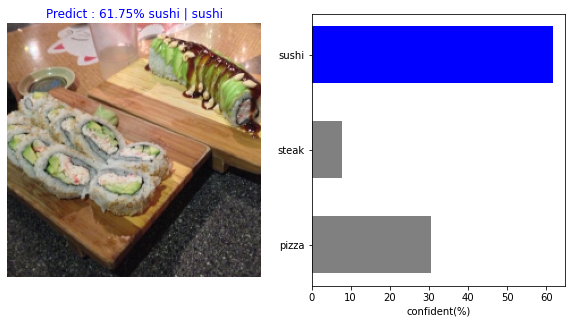

In [228]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(custom_image_transformed.permute(1,2,0))
confident = probas[0][pred_class_idx][0] * 100
color = 'blue' if pred_class == true_label else 'red'
plt.title(f'Predict : {confident:.2f}% {pred_class} | {true_label}', c=color)
plt.axis('off')
plt.subplot(1,2,2)
barh_color = []
for class_ in class_names  :
    if class_ == pred_class and pred_class == true_label  :
        barh_color.append('blue')
    else :
        if class_ == true_label :
            barh_color.append('red')
        else :
            barh_color.append('gray')
plt.barh(class_names, probas[0]*100, height=0.6, color=barh_color)
plt.xlabel('confident(%)');

### Combine together

In [257]:
def PredCustomImage(model, image_path, plot=True) :
    if isinstance(image_path, list) and len(image_path) > 1 :
        random_idx = np.random.permutation(len(image_path))
        random_images = image_path[random_idx[20]]
    else :
        random_images = image_path
    true_label = random_images.split('/')[-1].split('\\')[0]

    custom_image_transformer = transforms.Compose([transforms.Resize((224,224))])
    custom_image = torchvision.io.read_image(random_images).type(torch.float32) / 255.
    custom_image_transformed = custom_image_transformer(custom_image)
    
    model.eval()
    with torch.inference_mode() :
        pred = model(custom_image_transformed.unsqueeze(dim=0).to(device)) # add batch size
        probas = torch.softmax(pred, dim=1)
        pred_class_idx = torch.argmax(probas, dim=1).cpu()
        pred_class = class_names[pred_class_idx]
    
    confident = probas[0][pred_class_idx][0] * 100
    if plot :
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.imshow(custom_image_transformed.permute(1,2,0))
        color = 'blue' if pred_class == true_label else 'red'
        plt.title(f'Predict : {confident:.2f}% {pred_class} | {true_label}', c=color)
        plt.axis('off')
        plt.subplot(1,2,2)
        barh_color = []
        for class_ in class_names  :
            if class_ == pred_class and pred_class == true_label  :
                barh_color.append('blue')
            else :
                if class_ == true_label :
                    barh_color.append('red')
                else :
                    barh_color.append('gray')
        plt.barh(class_names, probas[0]*100, height=0.6, color=barh_color)
        plt.xlabel('confident(%)');
    else : 
        correct_or_not = 'CORRECT' if pred_class == true_label else 'WRONG'
        print(f'{correct_or_not} | Predict : {confident:.2f}% {pred_class} | {true_label}')

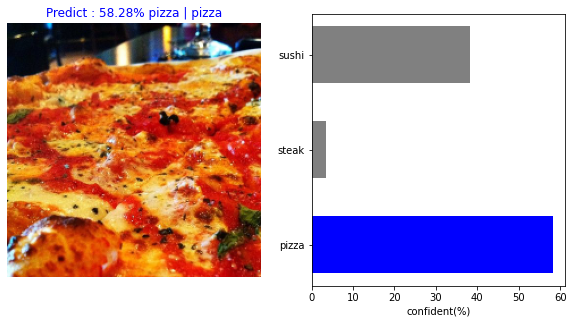

In [258]:
PredCustomImage(modelV1_loaded, images_path[11],plot=True)

In [262]:
for sample in range(10) :
    PredCustomImage(modelV1_loaded, images_path,plot=False)

CORRECT | Predict : 81.84% steak | steak
WRONG | Predict : 60.42% steak | sushi
WRONG | Predict : 66.08% sushi | steak
CORRECT | Predict : 61.75% sushi | sushi
CORRECT | Predict : 61.88% sushi | sushi
CORRECT | Predict : 59.18% sushi | sushi
WRONG | Predict : 40.85% sushi | steak
CORRECT | Predict : 57.14% sushi | sushi
WRONG | Predict : 51.37% sushi | pizza
CORRECT | Predict : 91.71% steak | steak
